### Практикум. Работа с альтиметрическими данными 

**Цель практикума** - познакомиться с альтиметрическими данными. Научиться их препроцессингу, визуализации и интерпретации.

<img src="attachment:49a1dee5-944b-4753-b8a0-0f7142f779ad.webp" width="600">

![el_nino.webp](attachment:49a1dee5-944b-4753-b8a0-0f7142f779ad.webp width="600")

Данные. Уровень обработки L4:

1. Файл **SLA.nc** содержит данные аномалий уровня моря (SLA) в точке. 

2. Файл **SLAM.nc** содержит поля SLA в восточной части Тихого океана. 

3. Файл **currents.nc** содержит поля геострофических скоростей (U и V компоненты) для восточной части Тихого океана. 

4. Файл **sea_ice.nc** содержит данные о толщине льда в Арктическом регионе. 

Данные аномалий уровня и скоростей течений получены из массива Global Ocean Gridded L 4 Sea Surface Heights And Derived Variables (https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047/description)

Данные по толщине льда получены из массива Arctic Ocean - Sea Ice Thickness (https://data.marine.copernicus.eu/product/SEAICE_GLO_PHY_CLIMATE_L3_MY_011_013/description)


In [35]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset, num2date

**Задание 1**

 - Загрузите данные SLA из файла SLA.nc. 
 
 - Определите какой срок охватывают данные, дискретность и где территориально проводились измерения. 
 
 - Разложите сигнал на компоненты (тренд, сезонную и остаточную составляющие). Визуализируйте результат. 


In [5]:
#Загрузите данные по аномалиями уровня из SLA.nc в переменные sla_point и time_point
sla = nc.Dataset('/Users/user/Yandex.Disk.localized/Лекции/ПУ/Школа/День_1/Альтиметрия/Задание 1/SLA.nc','r')
sla_point = sla.variables['sla'][:]
time_point = sla.variables['time']

In [6]:
#Конвертируйте время в формат d.%m.%Y
time_point = sla.variables['time']
time_units = time_point.units
time_values = time_point[:]
time_point = nc.num2date(time_values, units=time_units)
time_point = [time_values.strftime('%d.%m.%Y') for time_values in time_point]

In [7]:
sla_point = sla_point.squeeze()

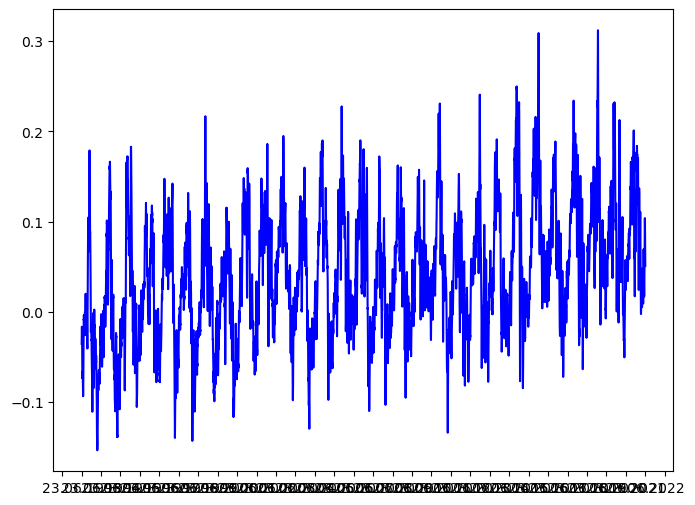

In [8]:
#Постройте график временного хода SLA. Попробуйте визуально оценить какая компонента доминирует и направление тренда. 
plt.figure(figsize=(8, 6))
plt.plot(time_point, sla_point , color='blue')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1)) 

In [9]:
period = 365 #setting the period for decomposition
# Apply seasonal_decompose
# тренд, сезонную и остаточную составляющие
result = seasonal_decompose(sla_point, model='additive', period=period)

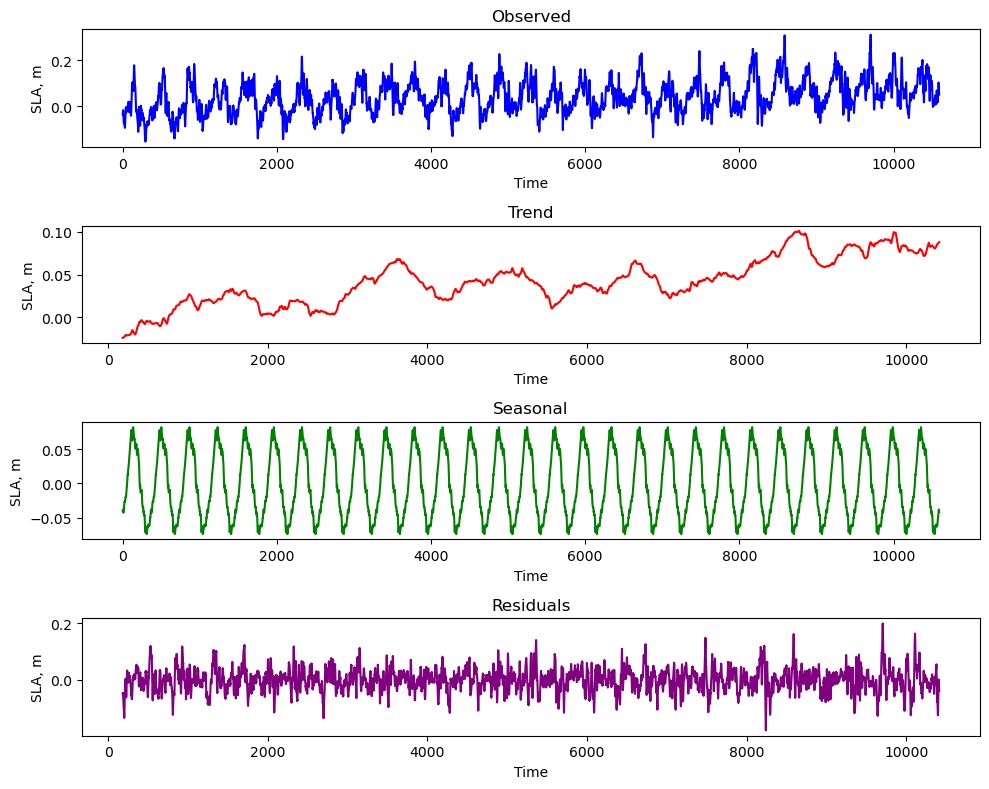

In [10]:
# Визуализируйте результат
plt.figure(figsize=(10, 8))

# Первый график: Исходные данные
plt.subplot(4, 1, 1)
plt.plot(result.observed, color='blue')
plt.title('Observed')
plt.xlabel('Time')
plt.ylabel('SLA, m')

# Второй график: Тренд
plt.subplot(4, 1, 2)
plt.plot(result.trend, color='red')
plt.title('Trend')
plt.xlabel('Time')
plt.ylabel('SLA, m')

# Третий график: Сезонная компонента
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, color='green')
plt.title('Seasonal')
plt.xlabel('Time')
plt.ylabel('SLA, m')

# Четвертый график: Остаточная компонента
plt.subplot(4, 1, 4)
plt.plot(result.resid, color='purple')
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('SLA, m')

plt.tight_layout()
plt.show()

In [34]:
has_nan = np.isnan(result.seasonal).any()
print("Есть NaN:", has_nan) 

Есть NaN: False


**Задание 2** 

 - Загрузите поля SLA из файла SLAM.nc. 
 
 - Определите какой срок охватывают данные, дискретность
 
 - Постройте поле SLA на любую дату

 - Постройте поле SLA на январь 2010 года

In [36]:
#Загрузите данные по аномалиями уровня, времени, долготу и  широту из файла SLA.nc в переменные sla_field, time_sla, longitude_sla, latitude_sla 
#Из переменной sla_field удалите первые 8 полей и последние пять. Аналогично - для вектора time_sla. 
sla = nc.Dataset('/Users/user/Yandex.Disk.localized/Лекции/ПУ/Школа/День_1/Альтиметрия/Задание 1/SLAM.nc','r')
#sla_field = sla.variables['sla'][8:-5]
#longitude_sla = sla.variables['longitude'][:]
#latitude_sla = sla.variables['latitude'][:]
#time_sla = sla.variables['time']

print(sla.variables) 

{'crs': <class 'netCDF4._netCDF4.Variable'>
int32 crs()
    comment: This is a container variable that describes the grid_mapping used by the data in this file. This variable does not contain any data; only information about the geographic coordinate system.
    inverse_flattening: 298.257
    semi_major_axis: 6378136.3
    grid_mapping_name: latitude_longitude
    _CoordinateTransformType: Projection
    _CoordinateAxisTypes: GeoX GeoY
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    axis: Y
    bounds: lat_bnds
    long_name: Latitude
    standard_name: latitude
    units: degrees_north
    valid_max: 70.875
    valid_min: -21.125
    _ChunkSizes: 50
    _CoordinateAxisType: Lat
unlimited dimensions: 
current shape = (369,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'sla': <class 'netCDF4._netCDF4.Variable'>
int32 sla(time, latitude, longitude

In [13]:
# Конвертируем время
dates = num2date(time_sla[:], units=time_sla.units, calendar=time_sla.calendar)
formatted_dates = [dt.strftime("%d.%m.%Y") for dt in dates]
time_sla  = formatted_dates[8:-5]
time_sla = np.array(time_sla) 

In [14]:
time_index = np.where(time_sla == '15.01.2010')[0][0]  # Find index of the matching date

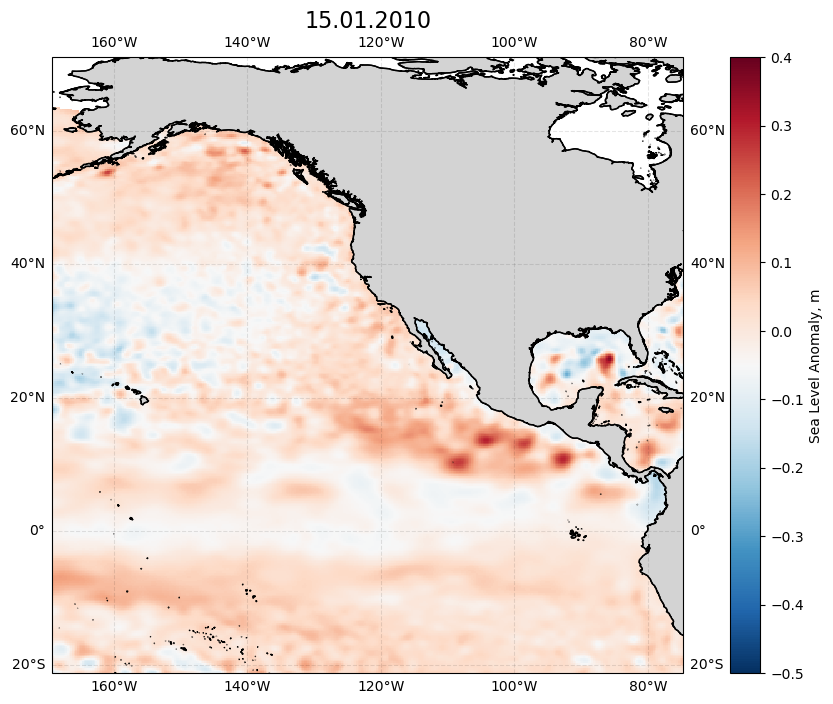

In [15]:
#Код для построения пространственного распределения SLA
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m'),
               facecolor='lightgray', edgecolor='black')
ax.coastlines(resolution='50m', color='black')  # '50m' for moderate resolution
cmap = plt.cm.Spectral_r
cax2 = ax.pcolormesh(longitude_sla, latitude_sla, sla_field[1,:,:],  vmin=-0.5, vmax=0.4,
                        cmap=plt.cm.RdBu_r,
                        transform=ccrs.PlateCarree())
gl0 = ax.gridlines(draw_labels=True, color='black', alpha=0.1, linestyle='--')
cbar = plt.colorbar(cax2, ax=ax, orientation='vertical', pad=0.05, label='Sea Level Anomaly, m')
plt.title(time_sla[time_index], fontsize=16)
plt.show()

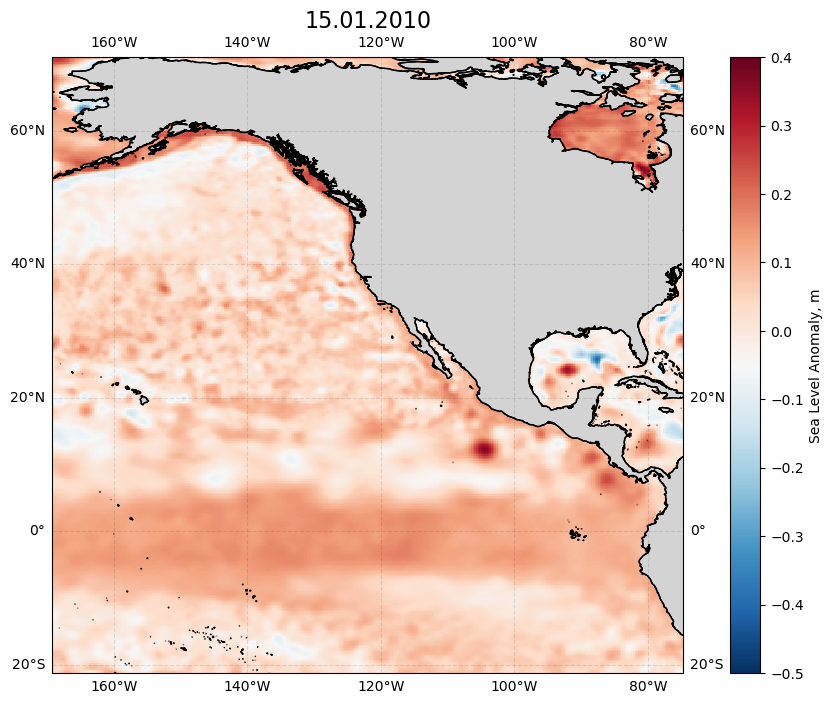

In [16]:
#Постройте поле аномалий уровня на на январь 2010 года 
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m'),
               facecolor='lightgray', edgecolor='black')
ax.coastlines(resolution='50m', color='black')  # '50m' for moderate resolution
cmap = plt.cm.Spectral_r
cax2 = ax.pcolormesh(longitude_sla, latitude_sla, sla_field[time_index,:,:],  vmin=-0.5, vmax=0.4,
                        cmap=plt.cm.RdBu_r,
                        transform=ccrs.PlateCarree())
gl0 = ax.gridlines(draw_labels=True, color='black', alpha=0.1, linestyle='--')
cbar = plt.colorbar(cax2, ax=ax, orientation='vertical', pad=0.05, label='Sea Level Anomaly, m')
plt.title(time_sla[time_index], fontsize=16)
plt.show()

**Задание 3** 

 - Загрузите поля скоростей течений (u и v компоненты) из файла currents.nc. 
 
 - Рассчитайте поле модуля скорости течений по формуле: 
 
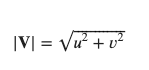

 - Постройте пространственное распределение скорости 
 
 - Найдите на построенном поле скорости Аляскинское течение и Гольфстрим и определите максимальную скорость этих течений

In [18]:
#Загрузите данные по компонентам скоростей течений, широту, долготу из  файла currents.nc в переменные u, v, latitude_cur, longitude_cur
ds_cur = nc.Dataset('/Users/user/Yandex.Disk.localized/Лекции/ПУ/Школа/День_1/Альтиметрия/Задание 1/currents.nc','r')
u = ds_cur.variables['ugos'][:]
v = ds_cur.variables['vgos'][:]
u = u.squeeze()
v = v.squeeze()
longitude_cur = ds_cur.variables['longitude'][:]
latitude_cur = ds_cur.variables['latitude'][:]

In [19]:
#Рассчитайте модуль скорости течений и сохраните его в переменную speed
speed = np.sqrt(u**2 + v**2)

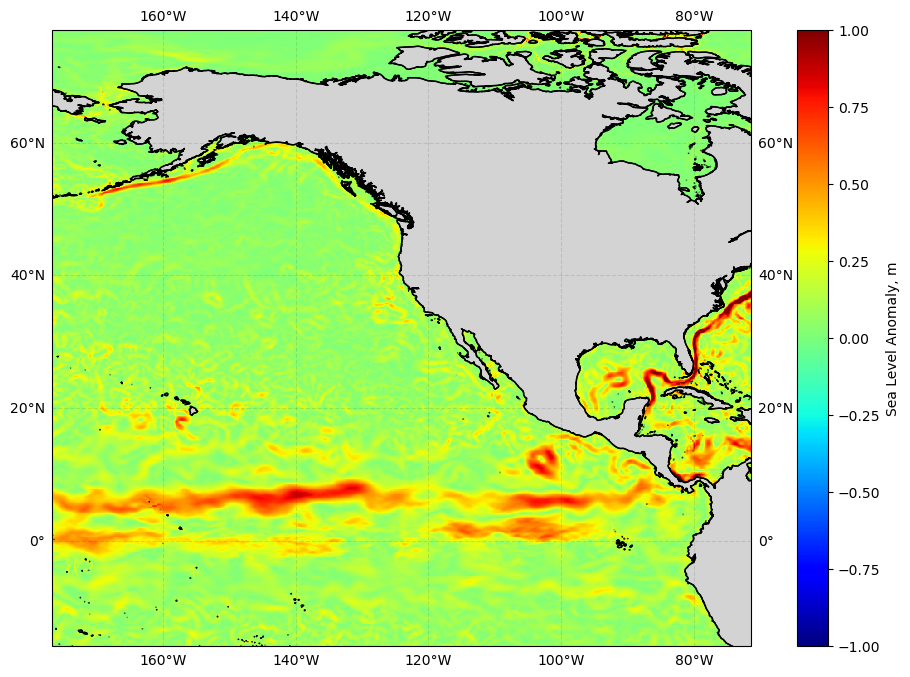

In [20]:
#Строим поле аномалий уровня на весь регион
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m'),
               facecolor='lightgray', edgecolor='black')
ax.coastlines(resolution='50m', color='black')  # '50m' for moderate resolution
cmap = plt.cm.Spectral_r
cax2 = ax.pcolormesh(longitude_cur, latitude_cur, speed,  vmin=-1, vmax=1,
                        cmap='jet',
                        transform=ccrs.PlateCarree())
gl0 = ax.gridlines(draw_labels=True, color='black', alpha=0.1, linestyle='--')
cbar = plt.colorbar(cax2, ax=ax, orientation='vertical', pad=0.05, label='Sea Level Anomaly, m')
plt.show()

**Задание 4**. Расчет тренда. 

 - Рассчитайте тренд аномалий уровня и постройте его пространственное распределение для исследуемого региона
 
 Данные для расчета возмите из файла SLAM.nc

In [21]:
#код для вычисление линейного тренда аномалий уровня моря:
#Определение размеров массива
nt, nlat, nlon = sla_field.shape
ngrd = nlon*nlat

# Преобразование данных в формат 2D
sla_grd  = sla_field.reshape((nt, ngrd), order='F') 

#Создание массива для хранения трендов
x = np.linspace(1,nt,nt)
sla_rate = np.empty((ngrd,1))
sla_rate[:,:] = np.nan

#Цикл по каждой точке сетки, рассчет линейной аппроксимация тренда
for i in range(ngrd): 
    y = sla_grd[:,i]         
    z = np.polyfit(x, y, 1)
    sla_rate[i,0] = z[0]*12

In [22]:
#Восстановление в 2D формат
sla_trend = sla_rate.reshape((nlat,nlon), order='F')

In [23]:
#переведите тренд в единицы см в год
sla_trend = sla_trend * 100.0

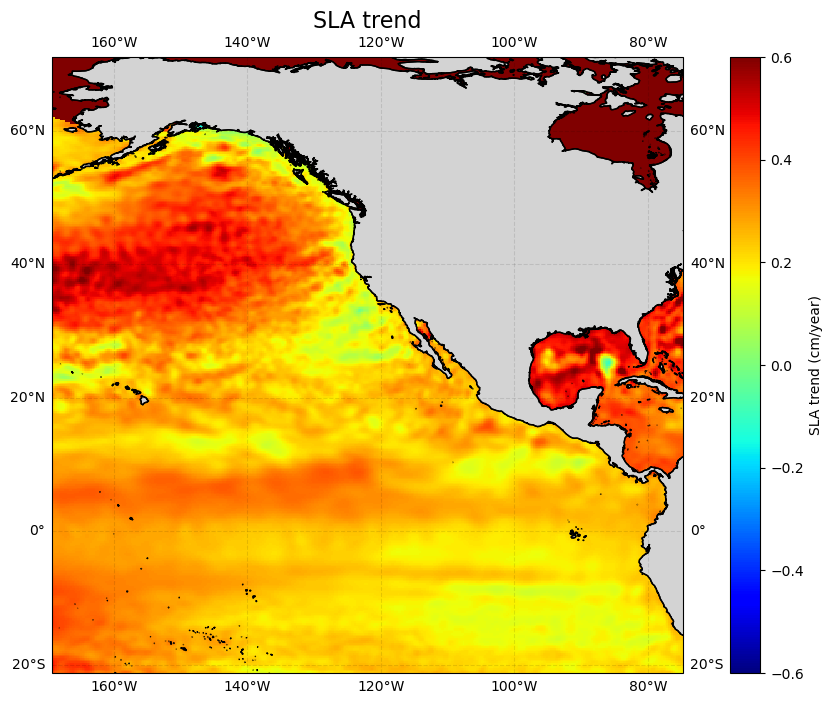

In [24]:
#Постройте пространственное распределение тренда для исследуемого региона
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m'),
               facecolor='lightgray', edgecolor='black')
ax.coastlines(resolution='50m', color='black')  # '50m' for moderate resolution
cmap = plt.cm.Spectral_r
cax2 = ax.pcolormesh(longitude_sla, latitude_sla, sla_trend,  vmin=-0.6, vmax=0.6,
                        cmap='jet',
                        transform=ccrs.PlateCarree())
gl0 = ax.gridlines(draw_labels=True, color='black', alpha=0.1, linestyle='--')
cbar = plt.colorbar(cax2, ax=ax, orientation='vertical', pad=0.05, label='SLA trend (cm/year)')
plt.title('SLA trend', fontsize=16)
plt.show()

Проанализируйте полученный результат. 

В каком регионе наблюдается наибольший рост уровня? 

Попробуйте найти объяснение. 

**Задание 5**. 

 - Рассчитайте и вычтите сезонную составляющую и тренд из исходных данных 
 
 - Рассчитайте стандартное отклонение SLA для исследумого региона и постройте распределение  

In [25]:
#Вычтите тренд из исходных данных и сохраните результат в переменную sla_detrend
sla_detrend = sla_field - sla_trend

In [26]:
#Код для рассчета сезонной составляющей:
# изменение формы массива sla_detrend так, чтобы данные были организованы по месяцам (12 месяцев на год)
sla_grd_ym  = sla_detrend.reshape((12,int(nt/12), ngrd), order='F').transpose((1,0,2))
# Вычисление среднего значения SLA для каждого месяца по всем годам
sla_grd_clm = np.mean(sla_grd_ym, axis=0)
# Удаление сезонной компоненты из данных SLA
sla_deseason = (sla_grd_ym - sla_grd_clm).transpose((1,0,2)).reshape((nt, nlat, nlon), order='F')

In [27]:
#рассчитайте стандартное отклонение остаточных данных и визуализируйте результат
sla_std = np.std(sla_deseason,axis=0)

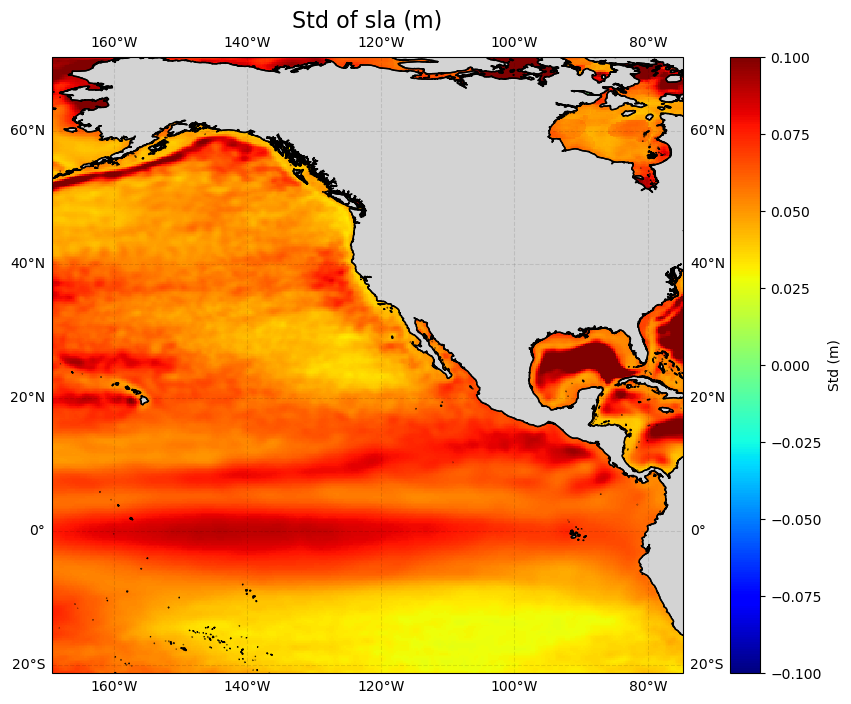

In [28]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m'),
               facecolor='lightgray', edgecolor='black')
ax.coastlines(resolution='50m', color='black')  # '50m' for moderate resolution
cax2 = ax.pcolormesh(longitude_sla, latitude_sla, sla_std,  vmin=-0.1, vmax=0.1,
                        cmap='jet',
                        transform=ccrs.PlateCarree())
gl0 = ax.gridlines(draw_labels=True, color='black', alpha=0.1, linestyle='--')
cbar = plt.colorbar(cax2, ax=ax, orientation='vertical', pad=0.05, label='Std (m)')
plt.title('Std of sla (m)', fontsize=16)
plt.show()

Проанализируйте полученный результат. 

Какие характерные паттерны распределения изменчивости уровня вы можете выделить в Тихом океана

С чем они могут быть связаны?

Какие дополнительные данные можно привлечь для интепретации полученного результата? 

**Задание 5**

 - Постройте распределение толщины морского льда для Арктического региона (файл sea_ice.nc) на любую дату
 
 - Рассчитайте тренд и визуализируйте его
 
 - Проанализируйте полученный результат

In [30]:
ds_ice = nc.Dataset('/Users/user/Yandex.Disk.localized/Лекции/ПУ/Школа/День_1/Альтиметрия/Задание 1/sea_ice.nc','r')

In [31]:
ice_thickness = ds_ice.variables['sea_ice_thickness'][:]
longitude = ds_ice.variables['longitude'][:]
latitude = ds_ice.variables['latitude'][:]
time = ds_ice.variables['time']

# Конвертируем время в нормальный формат
dates = num2date(time[:], units=time.units, calendar=time.calendar)
formatted_dates = [dt.strftime("%Y %d %b") for dt in dates]

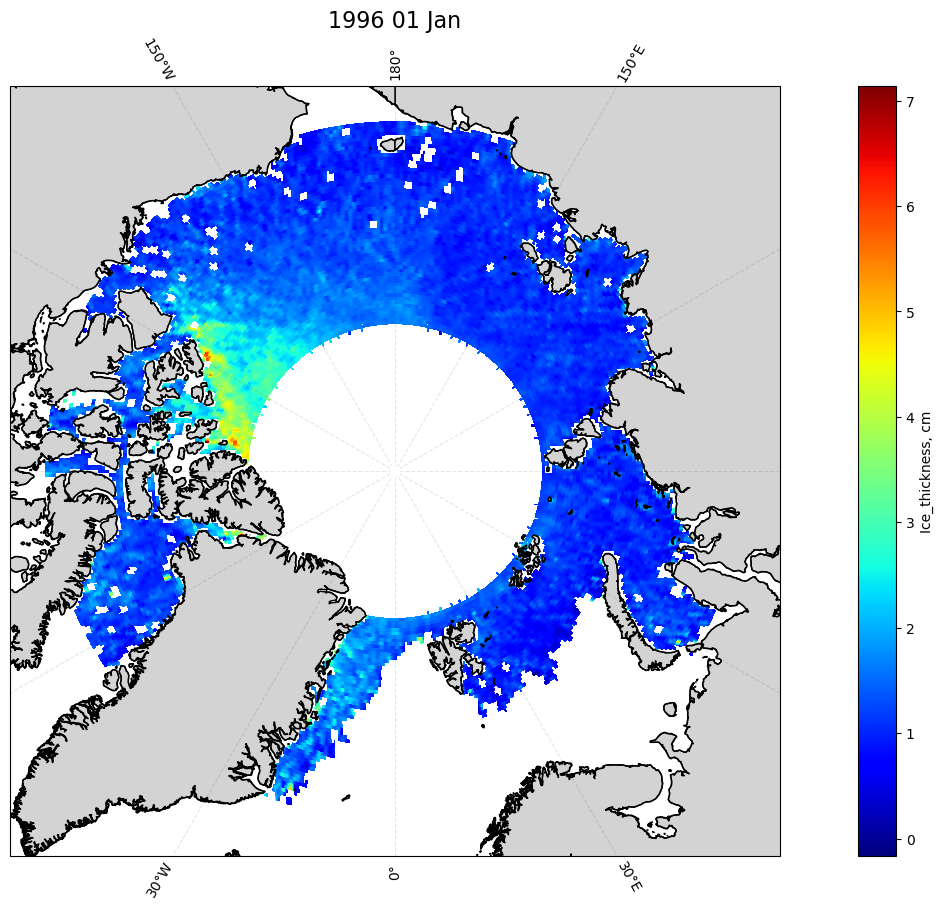

In [32]:
#Строим поле толщины морского льда на любую дату

fig, ax = plt.subplots(1, 1, figsize=(20, 10), 
                       subplot_kw={'projection': ccrs.NorthPolarStereo()})


ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m'),
               facecolor='lightgray', edgecolor='black')
ax.coastlines(resolution='50m', color='black')  # '50m' for moderate resolution

# sla[0,:,:] - выбираем конкретный срок и строим картинку
cmap = plt.cm.Spectral_r

cax2 = ax.pcolormesh(longitude, latitude, ice_thickness[0,:,:],
                        cmap='jet',
                        transform=ccrs.PlateCarree())
gl0 = ax.gridlines(draw_labels=True, color='black', alpha=0.1, linestyle='--', xlocs=np.arange(-180, 180, 30), ylocs=np.arange(-80, -20, 5))
cbar = plt.colorbar(cax2, ax=ax, orientation='vertical', pad=0.05, label='Ice_thickness, cm')
plt.title(formatted_dates[0], fontsize=16)
plt.show()

In [206]:
#Код для рассчета тренда
nt, nlat, nlon = ice_thickness.shape
ngrd = nlon*nlat
ice_grd = ice_thickness.reshape((nt, ngrd), order='C') 
x = np.linspace(1, nt, nt)
ice_rate = np.empty((ngrd, 1))
ice_rate[:, :] = np.nan

for i in range(ngrd): 
    y = ice_grd[:, i]
    # Remove NaNs
    mask = ~np.isnan(y)
    if np.sum(mask) > 1:  # Ensure at least 2 valid points for fitting
        z = np.polyfit(x[mask], y[mask], 1)
        ice_rate[i, 0] = z[0] * 12  # Convert monthly trend to yearly trend

ice_trend = ice_rate.reshape((nlat, nlon), order='C')
ice_trend[np.isnan(ice_thickness[0, :, :])] = np.nan

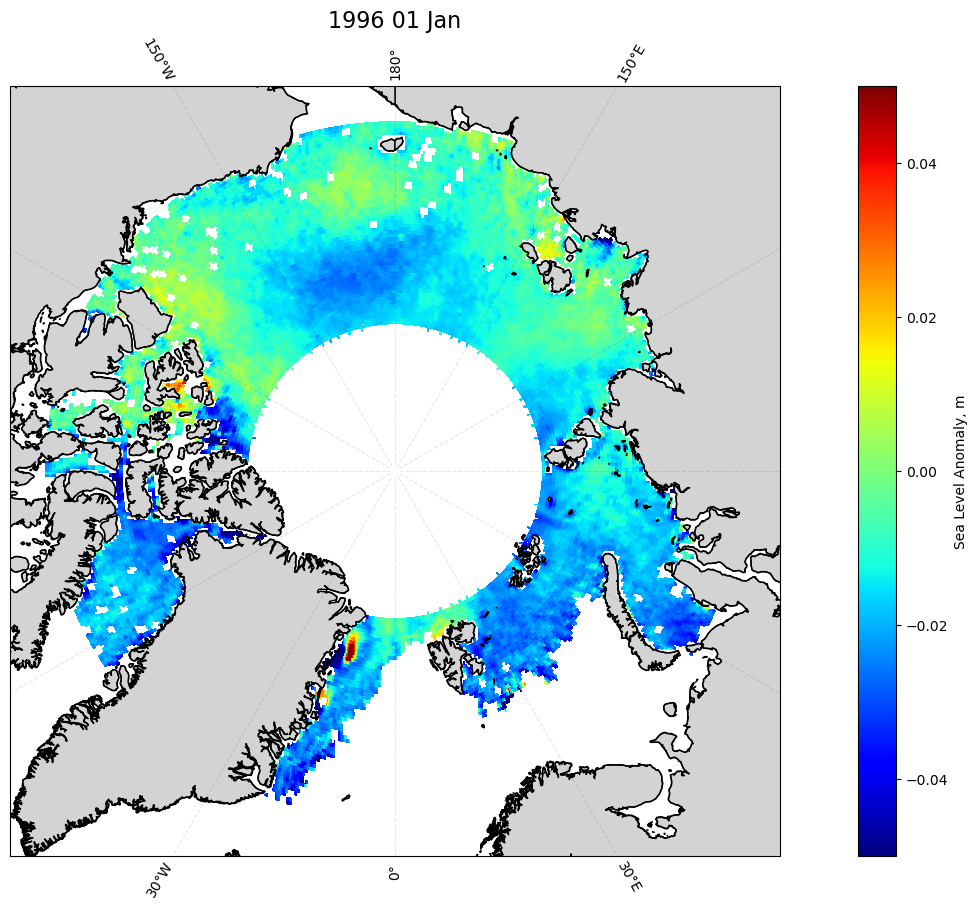

In [207]:
#Строим поле аномалий уровня на весь регион

fig, ax = plt.subplots(1, 1, figsize=(20, 10), 
                       subplot_kw={'projection': ccrs.NorthPolarStereo()})


ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m'),
               facecolor='lightgray', edgecolor='black')
ax.coastlines(resolution='50m', color='black')  # '50m' for moderate resolution

# sla[0,:,:] - выбираем конкретный срок и строим картинку
cmap = plt.cm.Spectral_r

cax2 = ax.pcolormesh(longitude, latitude, ice_trend, vmin=-0.05, vmax=0.05,
                        cmap='jet',
                        transform=ccrs.PlateCarree())
gl0 = ax.gridlines(draw_labels=True, color='black', alpha=0.1, linestyle='--', xlocs=np.arange(-180, 180, 30), ylocs=np.arange(-80, -20, 5))
cbar = plt.colorbar(cax2, ax=ax, orientation='vertical', pad=0.05, label='Sea Level Anomaly, m')
plt.title(formatted_dates[0], fontsize=16)
# Сохраняем файл (опциально)
#plt.savefig('sine_wave.png')
plt.show()